experiments/datasets/11821f8cbfaa0b6a1675346f98322ead.json


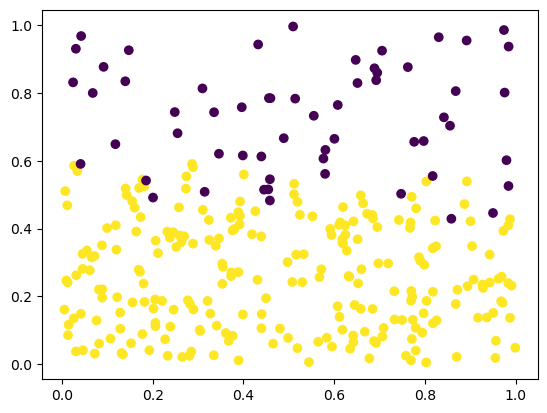

experiments/datasets/2b8324542032591c520cf2bf38ce1313.json


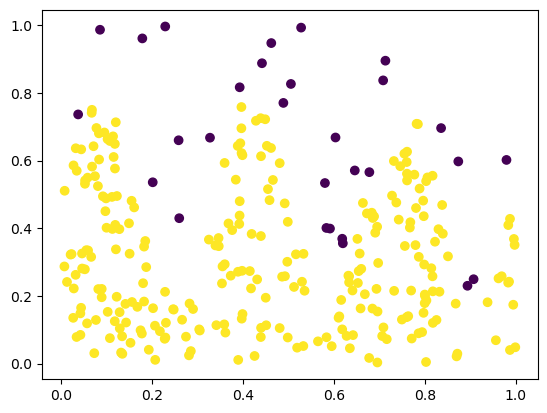

experiments/datasets/2b1c56f871393bf655100349e39caaa3.json


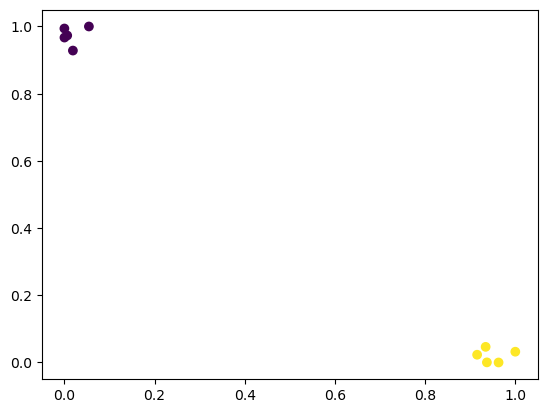

experiments/datasets/ff89c17b0ee181abd72e691a10b27bf9.json


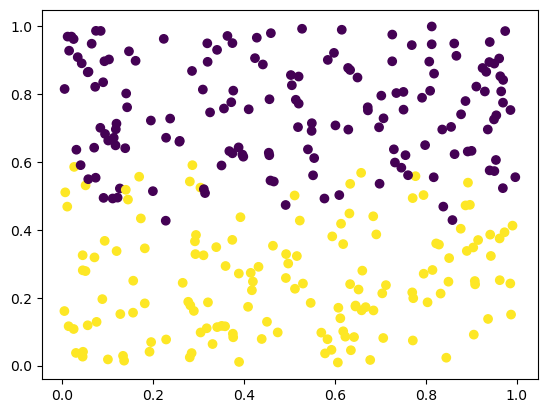

experiments/datasets/43ba63431b78204279d6ce589f85a65e.json


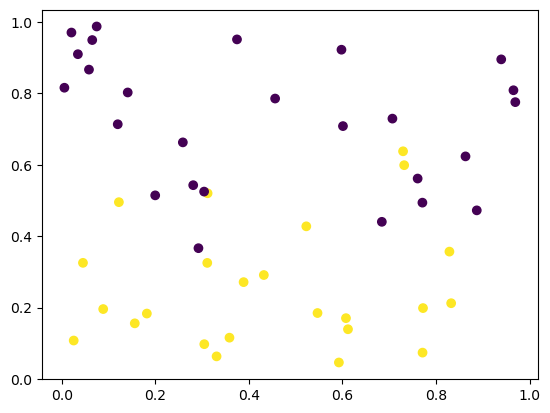

experiments/datasets/c1fecee4a9fffdc9e2e0db4dca078534.json


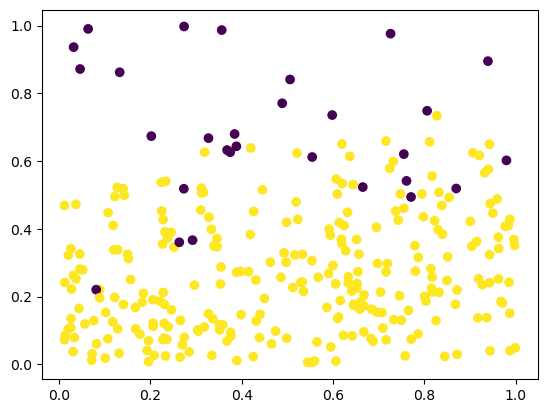

experiments/datasets/fe7a1e846cfad2c05d754de0c5969ea3.json


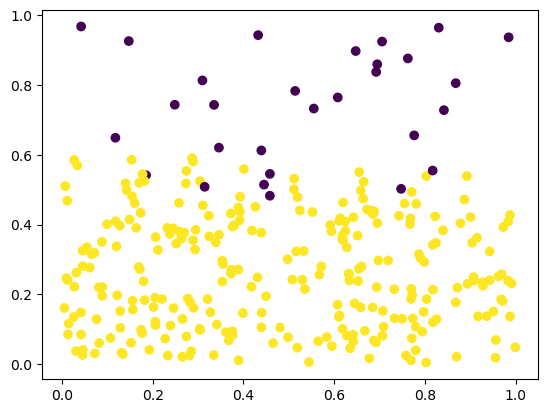

experiments/datasets/cd99f506c07591afed6557e8eb25285d.json


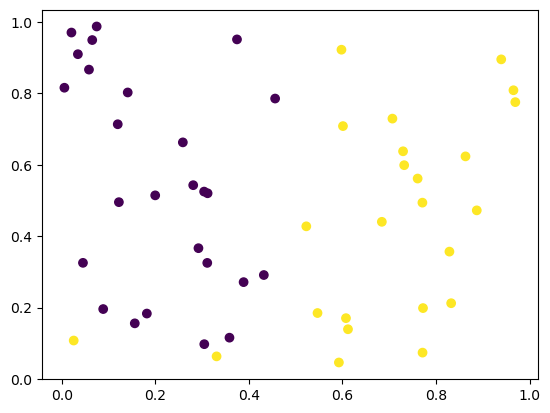

experiments/datasets/6340ead3f8a9ea762eaf5c2132fc757a.json


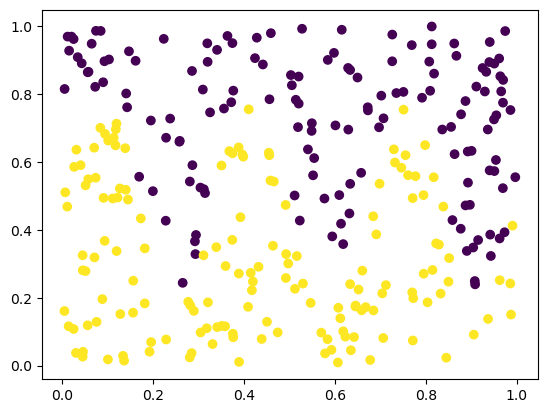

experiments/datasets/984b0f883d0210b869830bb4a1e6abdf.json


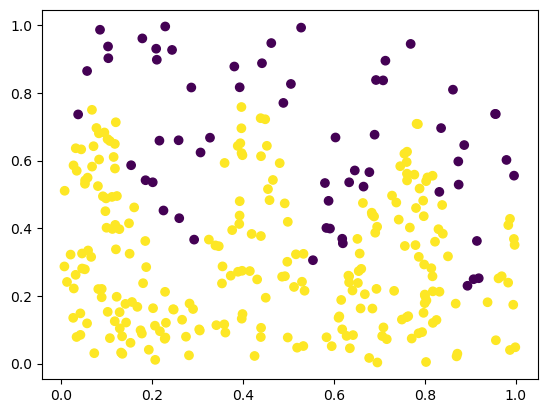

experiments/datasets/4866a56c176db9624e6d8bb02f2de8e1.json


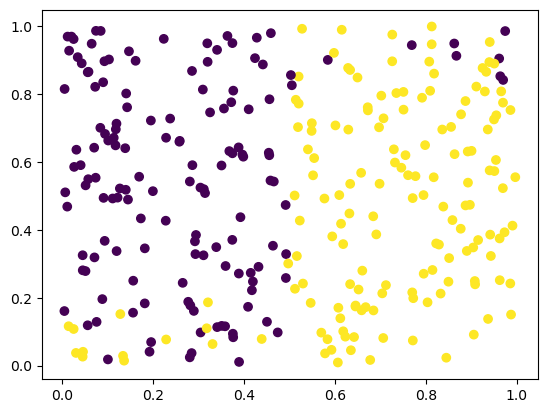

experiments/datasets/e5328c6c1bb86a945a32033f1cd39fec.json


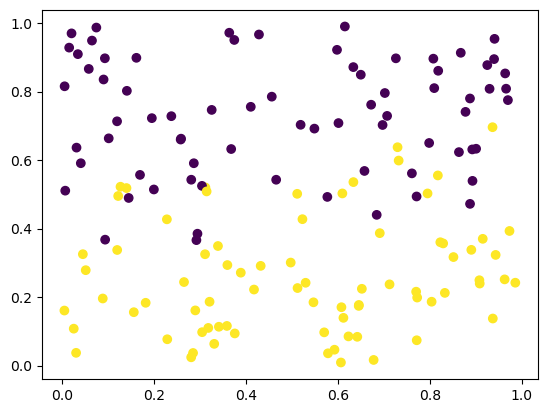

experiments/datasets/83fcad681055b44f31f127af2b928db5.json


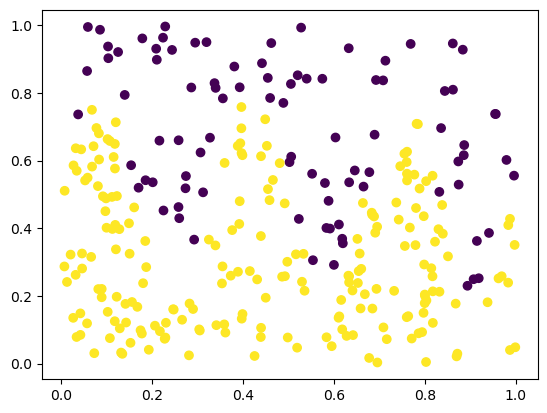

experiments/datasets/e2437c9789aa4f007ad6d1868e3004d2.json


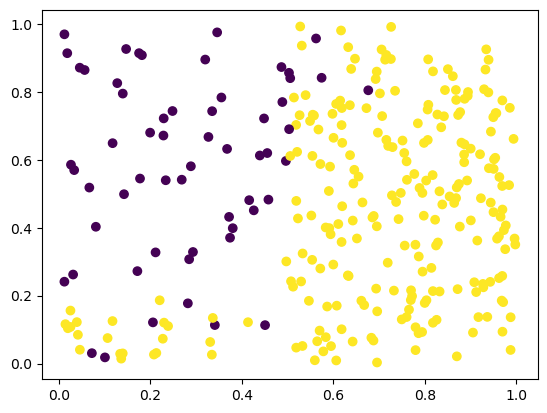

experiments/datasets/4b9b0c821f73c8745c631c28e998ccb6.json


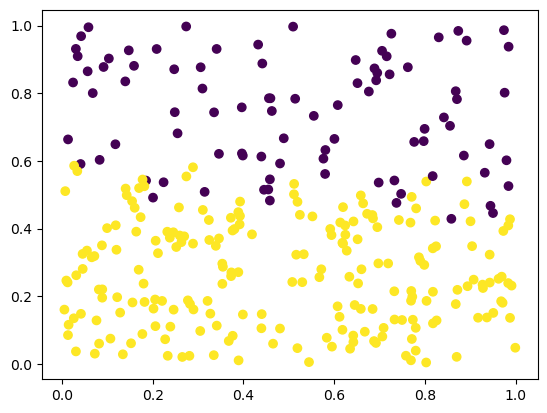

experiments/datasets/3d65b9974d3366f56865691bb815308d.json


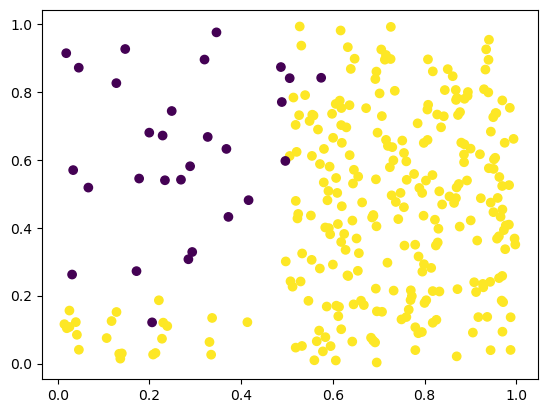

experiments/datasets/c909c284a99cdf44d8d51d2ea62d334d.json


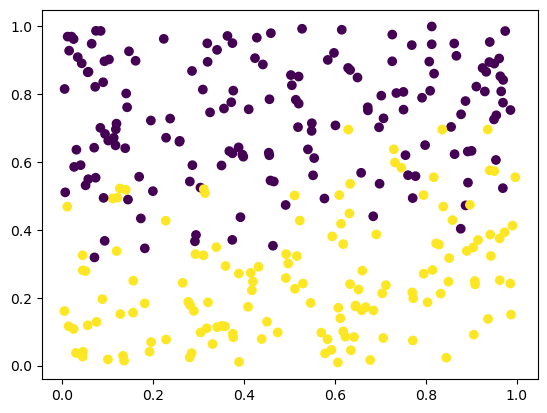

experiments/datasets/bd7244755f6abc6c84563d2f4a993a94.json


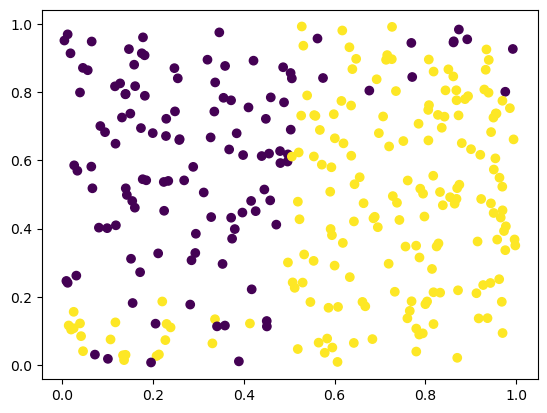

experiments/datasets/34638f73a9856f52923d072625877132.json


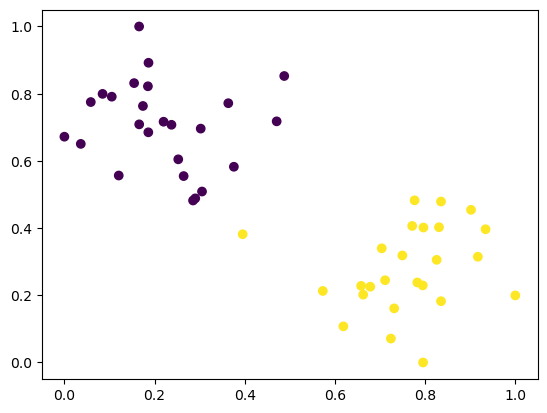

experiments/datasets/8ec787df45156b364ca3f6dc821d7751.json


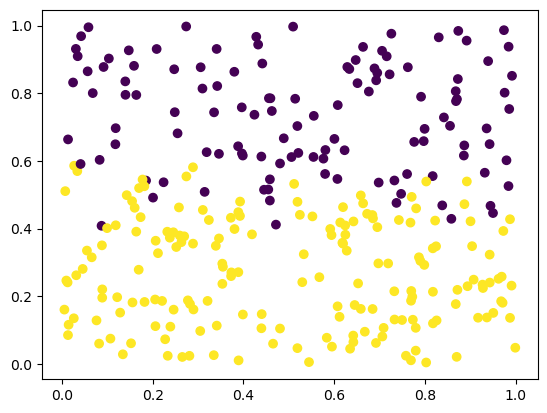

experiments/datasets/dbf8ffbdde7956d18b70e4e11fabec84.json


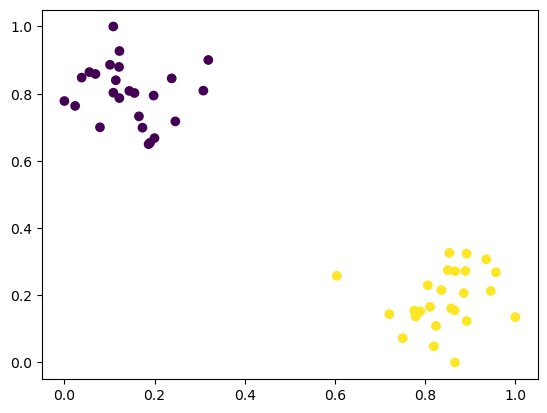

experiments/datasets/894f583134aa64a610d94f2357685ba6.json


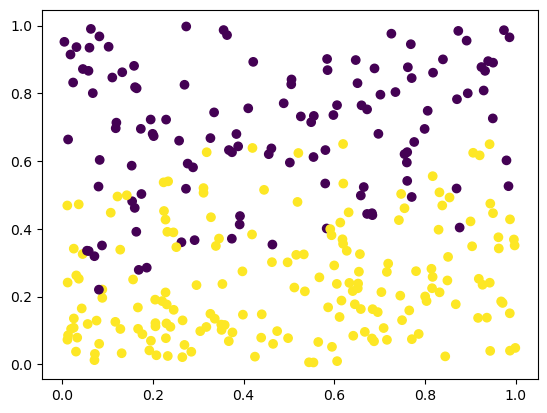

experiments/datasets/7e55f4b671f0550c745f471e7fa50b49.json


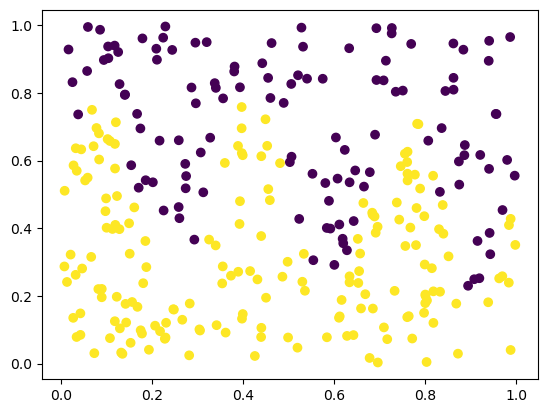

experiments/datasets/8cd26a80b1bcc143aef0466c1a1074a4.json


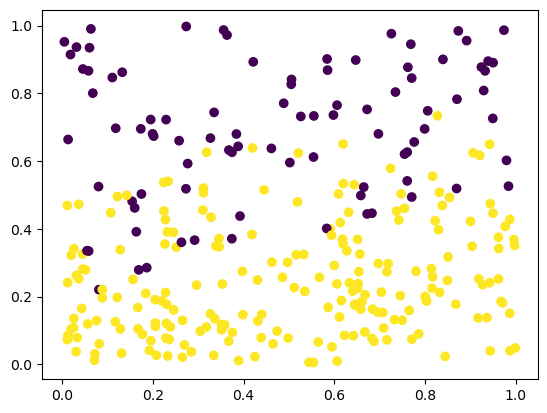

experiments/datasets/f084779d3750af1f2fd1c336b4aa5427.json


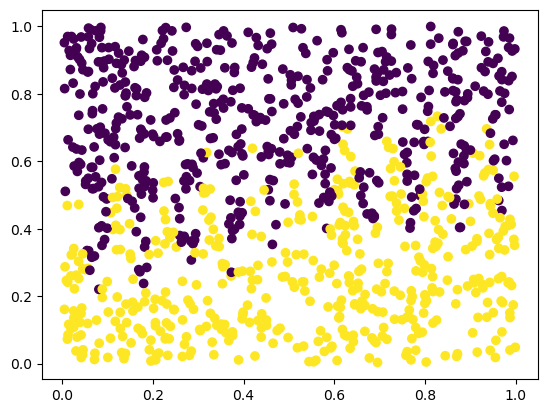

experiments/datasets/338e04df74c845ee2a7e83fcea3db902.json


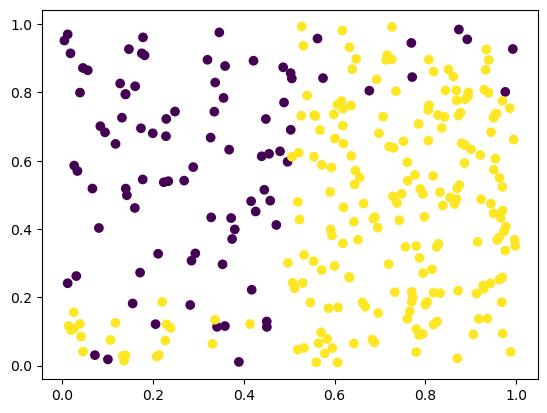

experiments/datasets/ffd8265801db48e79f72935963b4e6fa.json


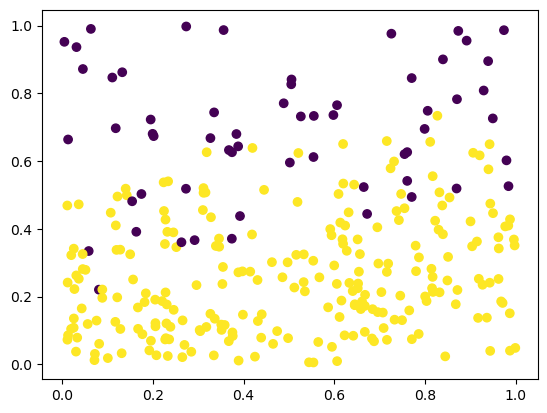

In [2]:
from experiments.datasets import *
from pathlib import Path
import matplotlib.pyplot as plt

for ds_f in Path("experiments/datasets").iterdir():
    ds = load_dataset(ds_f)
    plt.scatter(*ds.X.T, c=ds.y)
    print(ds_f)
    plt.show()

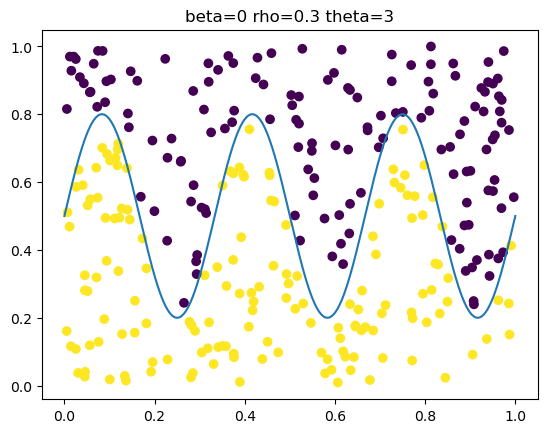

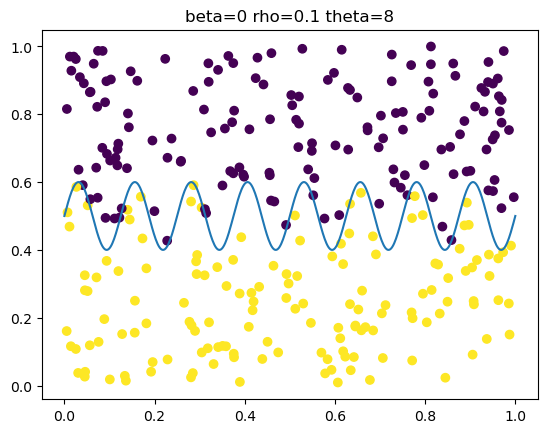

In [18]:
def get_decision_function(beta, rho, theta):
    # wave-like function to create a margin. Can tune difficulty of classification by changing parameters
    return lambda x:1 / (1 + np.exp(-beta * (x - 0.5))) + rho * np.sin(2 * np.pi * theta * x)

confs = [
    #(1,  .2, 10),
    #(95, .2, 10),
    #(1, 1, 1)
    (0, .3, 3),
    (0, .1, 8)
]

for b,r,t in confs:
    x_df = np.linspace(0, 1, 500)
    y_df = get_decision_function(b,r,t)(x_df)
    plt.plot(x_df, y_df)

    ds = dataset_from_custom_function(b, r, t)
    plt.scatter(*ds.X.T, c=ds.y)
    plt.title(f"beta={b} rho={r} theta={t}")
    plt.show()

In [2]:
import ipywidgets as widgets
import numpy as np

def plot(beta=1.0, rho=1.0, theta=1.0):
    x_df = np.linspace(0, 1, 500)
    y_df = get_decision_function(b,r,t)(x_df)
    plt.plot(x_df, y_df)

    ds = dataset_from_custom_function(b, r, t)
    plt.scatter(*ds.X.T, c=ds.y)
    plt.title(f"beta={b} rho={r} theta={t}")
    
widgets.interact(plot, beta=(.1,100,.1), rho=(.1,100,.1), theta=(.1,100,.1))

interactive(children=(FloatSlider(value=1.0, description='beta', min=0.1), FloatSlider(value=1.0, description=…

<function __main__.plot(beta=1.0, rho=1.0, theta=1.0)>

In [11]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Building jupyterlab assets (production, minimized)


In [4]:
ds = load_dataset("experiments/datasets/8cd26a80b1bcc143aef0466c1a1074a4.json")

print(ds.params)

from sklearn.svm import SVC as skSVC
from budgetsvm.svm import SVC
from budgetsvm.kernel import GaussianKernel

# model = SVC(C=1.0, kernel=GaussianKernel(sigma=0.1))
# model.fit(ds.X_train, ds.y_train)
# print(model.score(ds.X_test, ds.y_test))
# print(len(model.alpha_))

# bm = SVC(C=100.0,kernel=GaussianKernel(sigma=0.1), budget=39)
# bm.fit(ds.X_train, ds.y_train)
# print(bm.score(ds.X_test, ds.y_test))
# print(len(bm.alpha_))

{'beta': 1, 'rho': 0.2, 'theta': 10, 'population_size': 1000, 'sample_size': 300, 'perc_positives': 0.7, 'test_size': 0.3, 'random_state': 42}
